In [1]:
#import libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [2]:
#Training, Performace evaluation and Ploting
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    trainedforest = RandomForestClassifier(class_weight='balanced',n_estimators = 800).fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
    fpr_rf, tpr_rf, _ = roc_curve(Y_Test, predictionforest)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [4]:
#reading data file
df = pd.read_excel('Mini_protein_data_Ha_for_ml_12_34.xlsx')

In [5]:
#Seperating data [Features,Lables]
#tranforming data [Lable encoder and Robust Scaler; Feature selection; PCA Dimentional reduction]
X = df.drop(['Category','Category_0_1','Category_12_34'], axis = 1)
Y = df['Category_12_34']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y)
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X = sfm.transform(X)
X.shape

(3713, 51)

Base Non-Tranformed data
[[391 188]
 [179 356]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.65      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


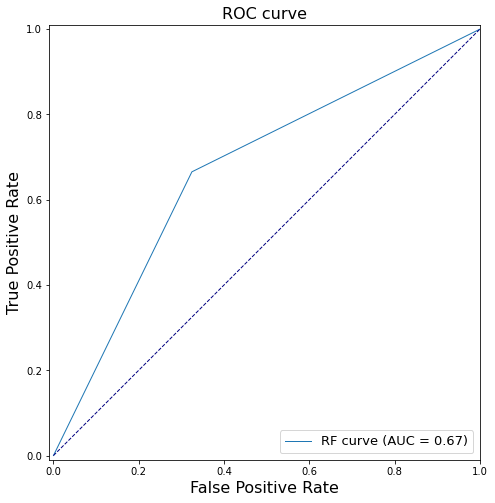

PCA Transformed - 2 dimensions is :-
[8.76934418 6.53212844]
[[386 193]
 [232 303]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       579
           1       0.61      0.57      0.59       535

    accuracy                           0.62      1114
   macro avg       0.62      0.62      0.62      1114
weighted avg       0.62      0.62      0.62      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


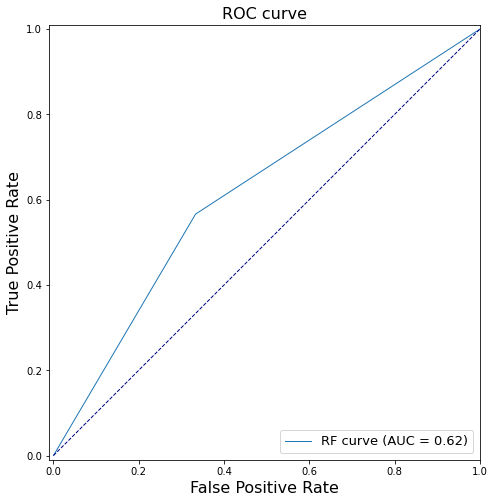

PCA Transformed - 3 dimensions is :-
[8.76934418 6.53212844 3.31259326]
[[377 202]
 [204 331]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       579
           1       0.62      0.62      0.62       535

    accuracy                           0.64      1114
   macro avg       0.63      0.63      0.63      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


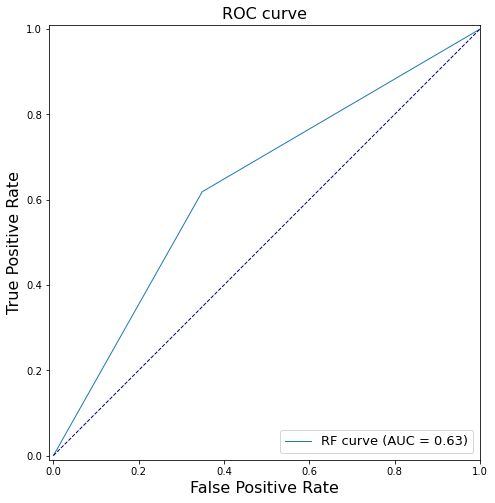

PCA Transformed - 4 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118]
[[376 203]
 [202 333]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       579
           1       0.62      0.62      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


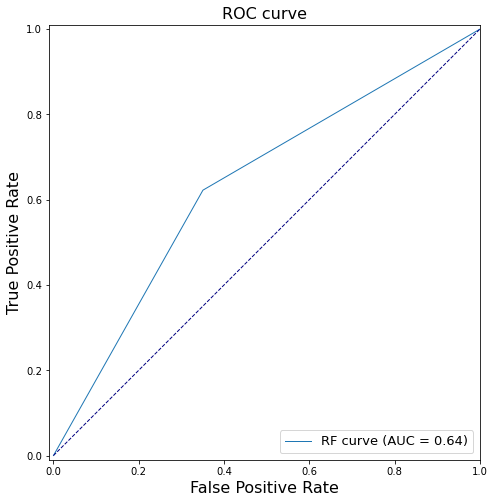

PCA Transformed - 5 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776]
[[378 201]
 [202 333]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       579
           1       0.62      0.62      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


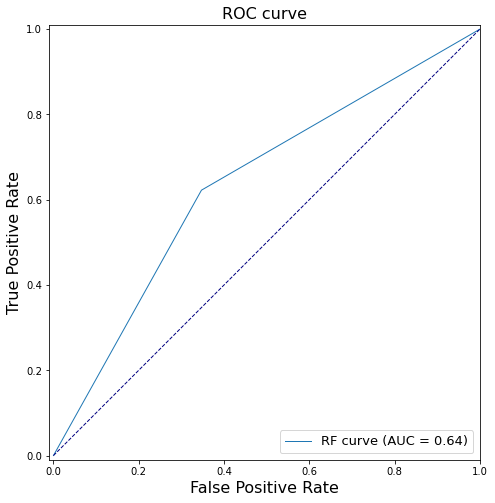

PCA Transformed - 6 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047]
[[397 182]
 [206 329]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       579
           1       0.64      0.61      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


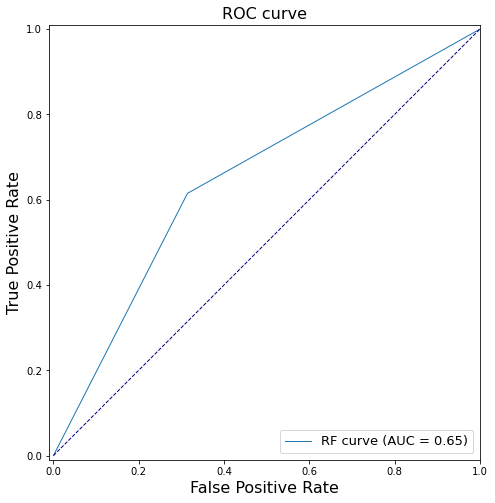

PCA Transformed - 7 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957]
[[384 195]
 [193 342]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       579
           1       0.64      0.64      0.64       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


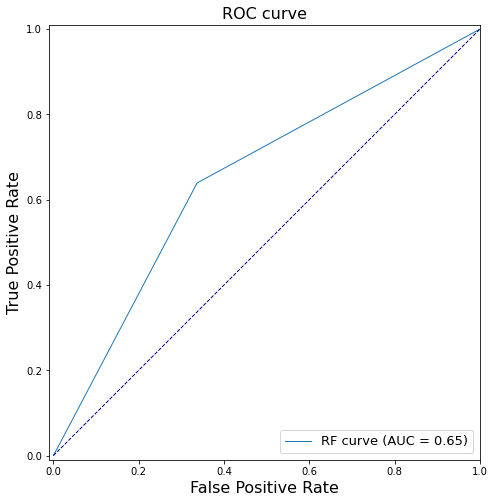

PCA Transformed - 8 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666]
[[379 200]
 [194 341]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       579
           1       0.63      0.64      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


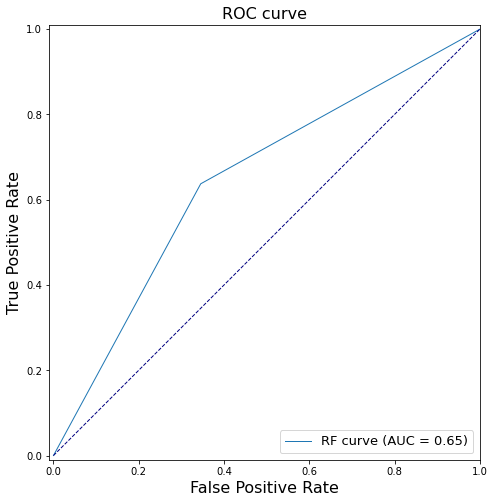

PCA Transformed - 9 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824]
[[381 198]
 [196 339]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       579
           1       0.63      0.63      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


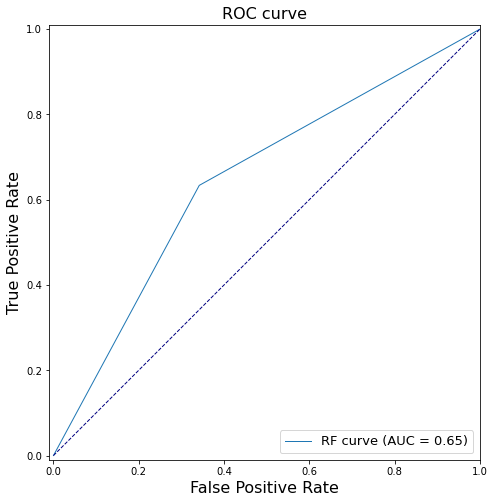

PCA Transformed - 10 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691]
[[397 182]
 [198 337]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       579
           1       0.65      0.63      0.64       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


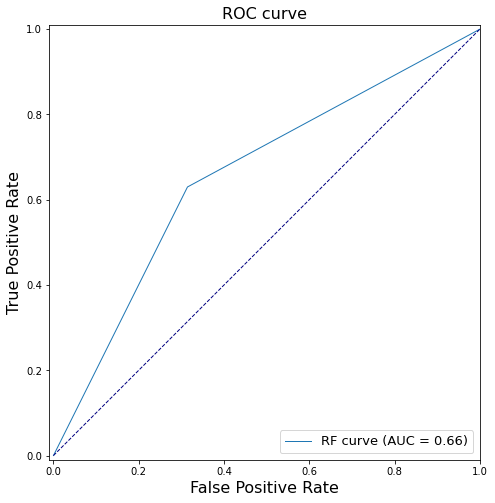

PCA Transformed - 11 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889]
[[393 186]
 [196 339]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       579
           1       0.65      0.63      0.64       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


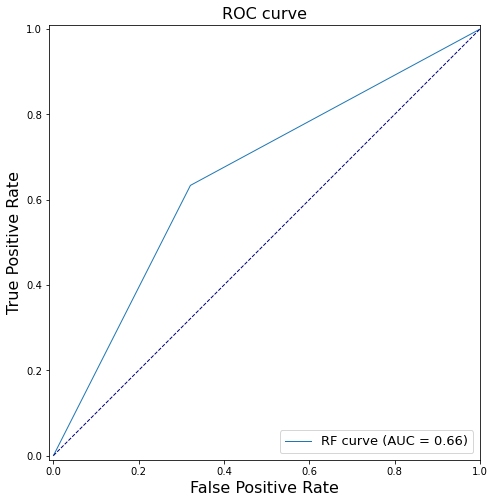

PCA Transformed - 12 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554]
[[393 186]
 [181 354]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


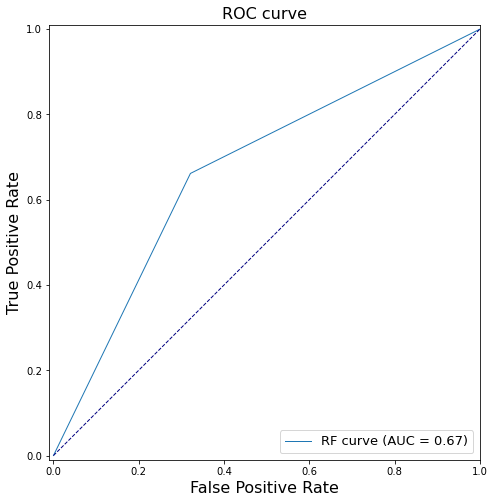

PCA Transformed - 13 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392]
[[392 187]
 [186 349]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.65      0.65      0.65       535

    accuracy                           0.67      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


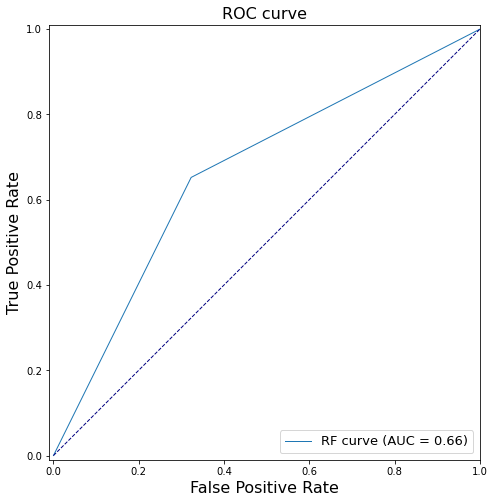

PCA Transformed - 14 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851]
[[398 181]
 [182 353]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


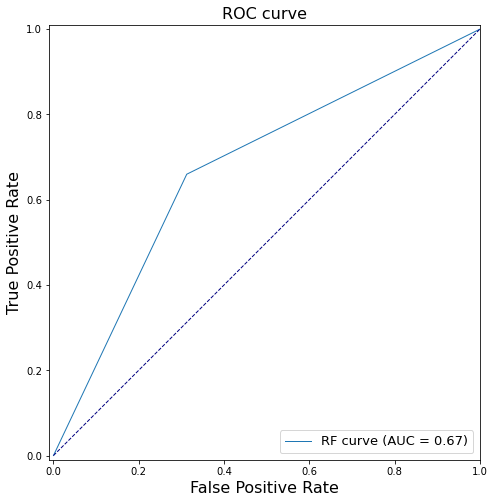

PCA Transformed - 15 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535]
[[403 176]
 [184 351]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       579
           1       0.67      0.66      0.66       535

    accuracy                           0.68      1114
   macro avg       0.68      0.68      0.68      1114
weighted avg       0.68      0.68      0.68      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


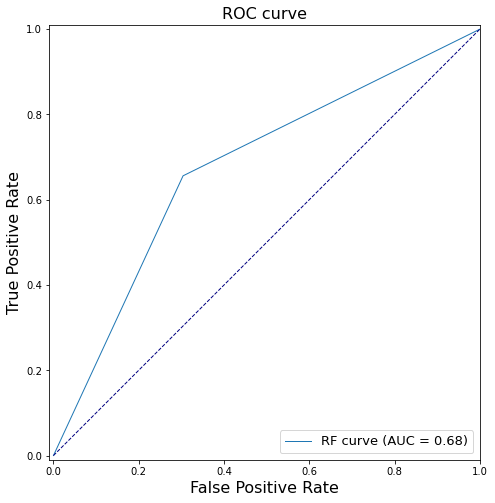

PCA Transformed - 16 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021]
[[391 188]
 [178 357]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


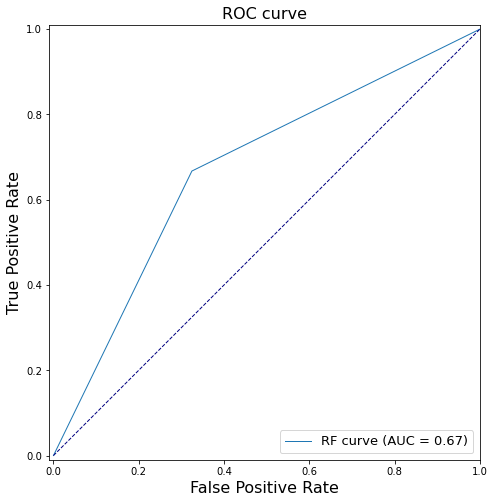

PCA Transformed - 17 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401]
[[392 187]
 [185 350]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.65      0.65      0.65       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


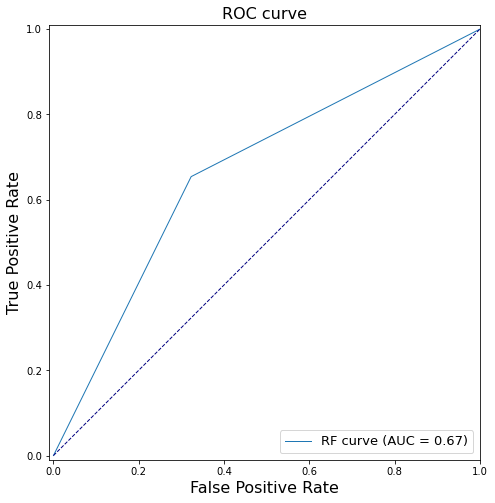

PCA Transformed - 18 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318]
[[393 186]
 [188 347]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.65      0.65      0.65       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


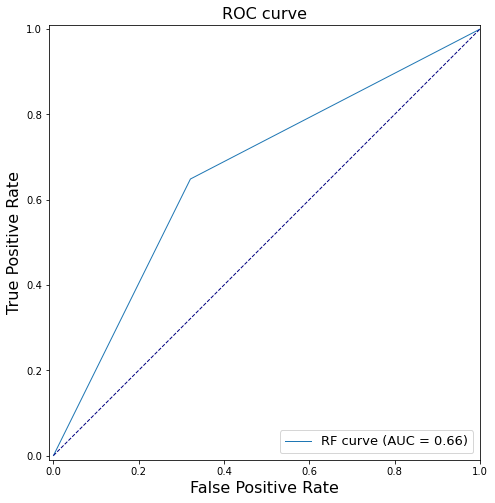

PCA Transformed - 19 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217]
[[397 182]
 [182 353]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


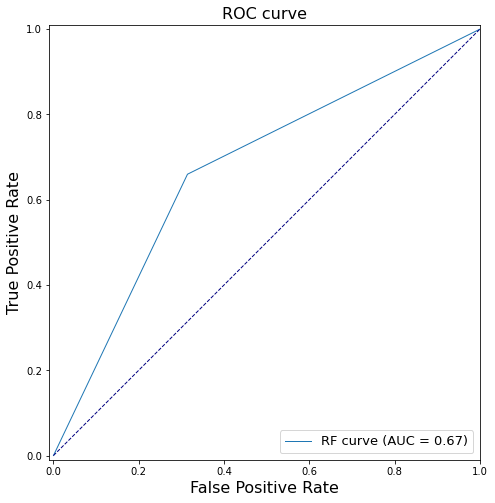

PCA Transformed - 20 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219]
[[388 191]
 [185 350]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       579
           1       0.65      0.65      0.65       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


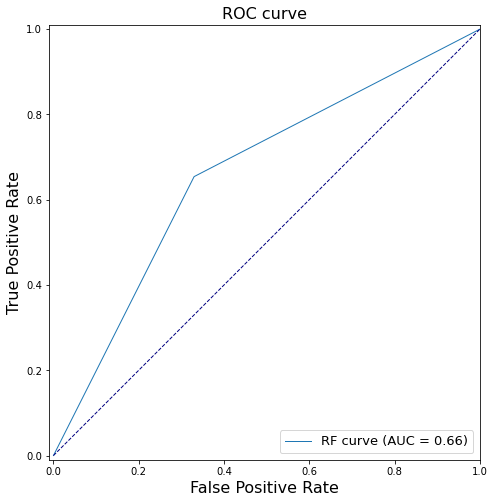

PCA Transformed - 21 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447]
[[392 187]
 [179 356]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


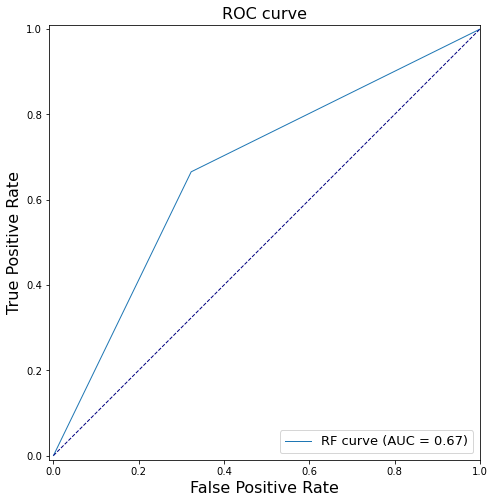

PCA Transformed - 22 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313]
[[398 181]
 [179 356]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       579
           1       0.66      0.67      0.66       535

    accuracy                           0.68      1114
   macro avg       0.68      0.68      0.68      1114
weighted avg       0.68      0.68      0.68      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


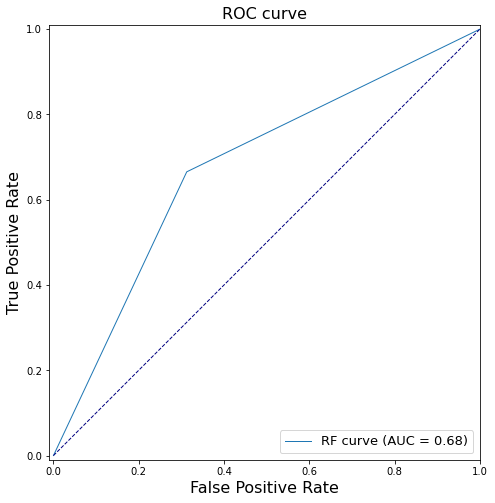

PCA Transformed - 23 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076]
[[387 192]
 [181 354]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       579
           1       0.65      0.66      0.65       535

    accuracy                           0.67      1114
   macro avg       0.66      0.67      0.66      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


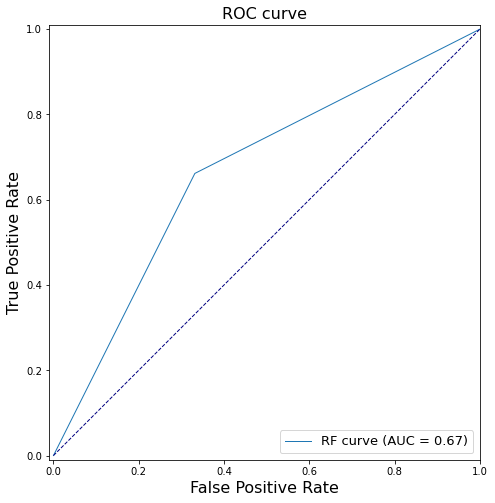

PCA Transformed - 24 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272]
[[394 185]
 [179 356]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


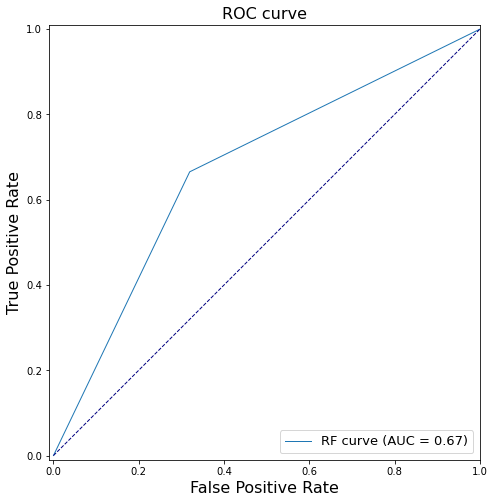

PCA Transformed - 25 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272
 0.07556151]
[[396 183]
 [181 354]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


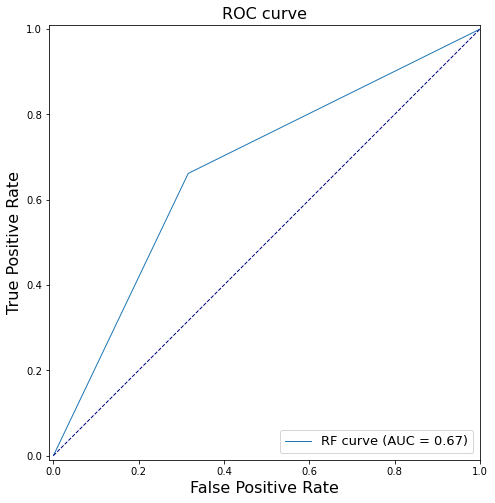

PCA Transformed - 26 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272
 0.07556151 0.05963662]
[[394 185]
 [180 355]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


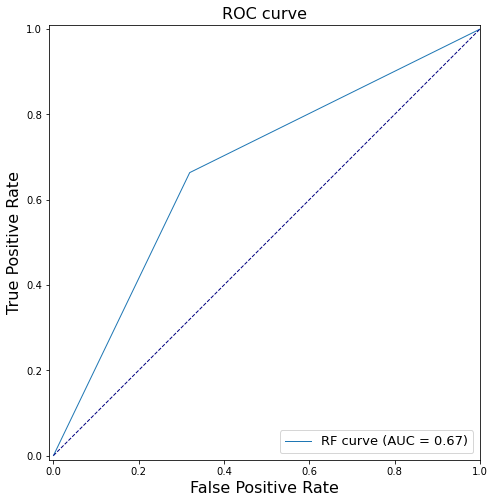

PCA Transformed - 27 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272
 0.07556151 0.05963662 0.04734092]
[[397 182]
 [183 352]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


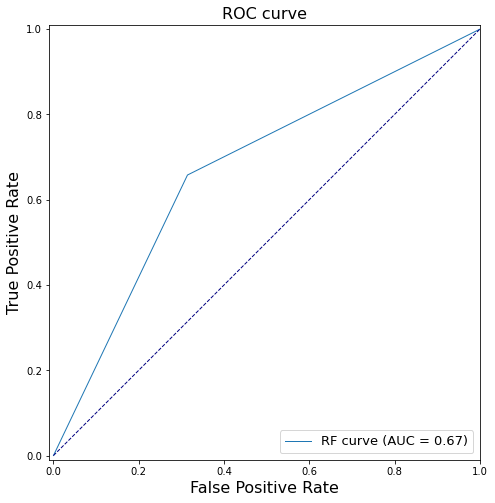

PCA Transformed - 28 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272
 0.07556151 0.05963662 0.04734092 0.0414235 ]
[[392 187]
 [179 356]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


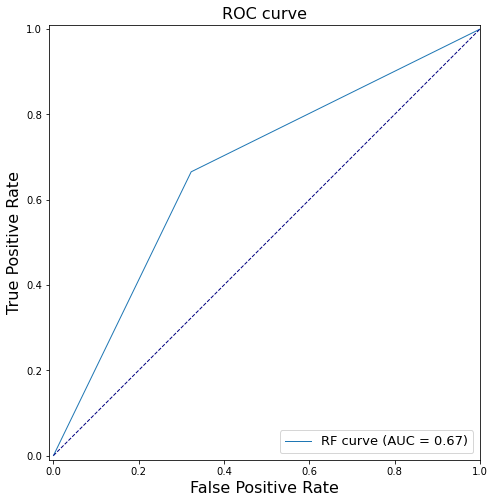

PCA Transformed - 29 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272
 0.07556151 0.05963662 0.04734092 0.0414235  0.02149623]
[[391 188]
 [177 358]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


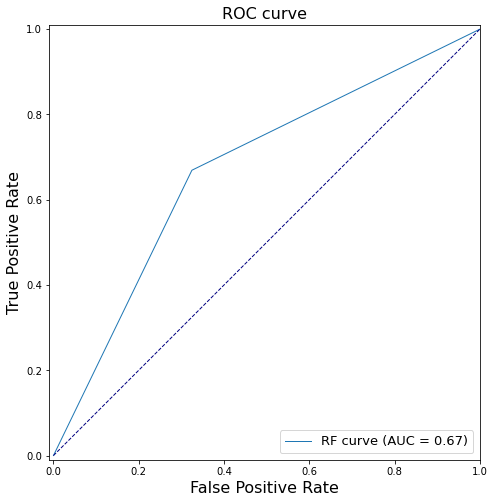

PCA Transformed - 30 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272
 0.07556151 0.05963662 0.04734092 0.0414235  0.02149623 0.01642834]
[[389 190]
 [179 356]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       579
           1       0.65      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


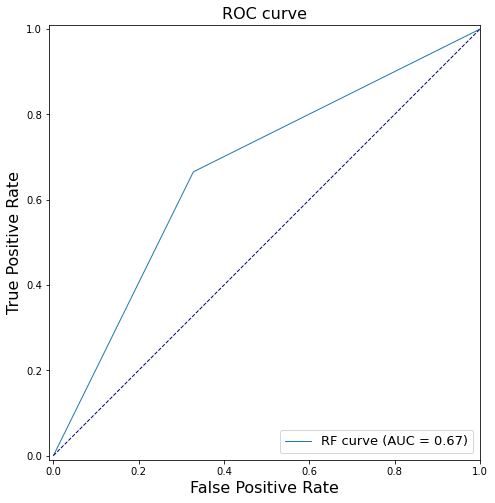

PCA Transformed - 31 dimensions is :-
[8.76934418 6.53212844 3.31259326 1.96931118 1.78042776 1.29881047
 1.05931957 0.63787666 0.56482824 0.42037691 0.39391889 0.35774554
 0.31731392 0.28233851 0.23390535 0.21762021 0.17854401 0.16764318
 0.15547217 0.13376219 0.11599447 0.10807313 0.09382076 0.08071272
 0.07556151 0.05963662 0.04734092 0.0414235  0.02149623 0.01642834
 0.01070354]
[[395 184]
 [181 354]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


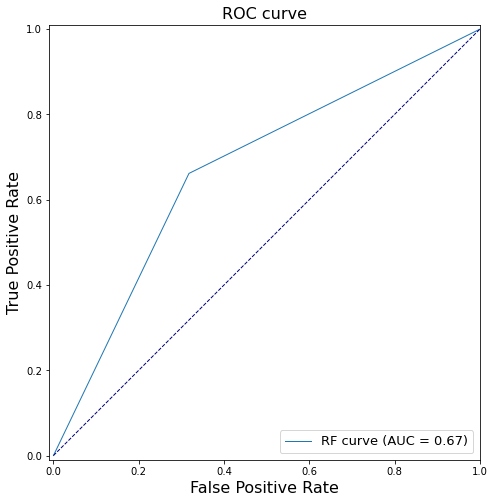

PCA Transformed - 32 dimensions is :-
[8.76934418e+00 6.53212844e+00 3.31259326e+00 1.96931118e+00
 1.78042776e+00 1.29881047e+00 1.05931957e+00 6.37876656e-01
 5.64828238e-01 4.20376915e-01 3.93918894e-01 3.57745542e-01
 3.17313916e-01 2.82338507e-01 2.33905346e-01 2.17620206e-01
 1.78544006e-01 1.67643180e-01 1.55472165e-01 1.33762192e-01
 1.15994465e-01 1.08073130e-01 9.38207612e-02 8.07127169e-02
 7.55615060e-02 5.96366221e-02 4.73409177e-02 4.14235029e-02
 2.14962320e-02 1.64283375e-02 1.07035387e-02 8.58970261e-03]
[[390 189]
 [183 352]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       579
           1       0.65      0.66      0.65       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


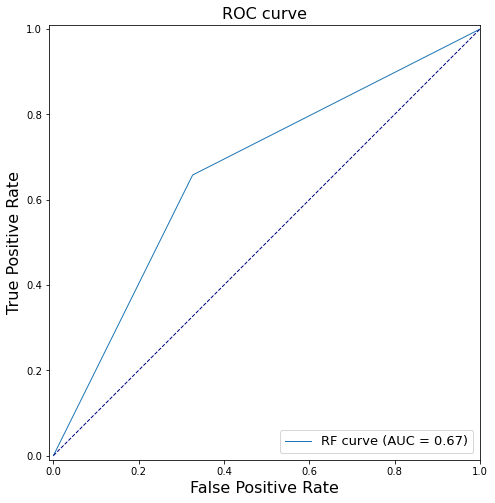

PCA Transformed - 33 dimensions is :-
[8.76934418e+00 6.53212844e+00 3.31259326e+00 1.96931118e+00
 1.78042776e+00 1.29881047e+00 1.05931957e+00 6.37876656e-01
 5.64828238e-01 4.20376915e-01 3.93918894e-01 3.57745542e-01
 3.17313916e-01 2.82338507e-01 2.33905346e-01 2.17620206e-01
 1.78544006e-01 1.67643180e-01 1.55472165e-01 1.33762192e-01
 1.15994465e-01 1.08073130e-01 9.38207612e-02 8.07127169e-02
 7.55615060e-02 5.96366221e-02 4.73409177e-02 4.14235029e-02
 2.14962320e-02 1.64283375e-02 1.07035387e-02 8.58970261e-03
 6.62304927e-03]
[[396 183]
 [179 356]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       579
           1       0.66      0.67      0.66       535

    accuracy                           0.68      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.68      0.68      0.68      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


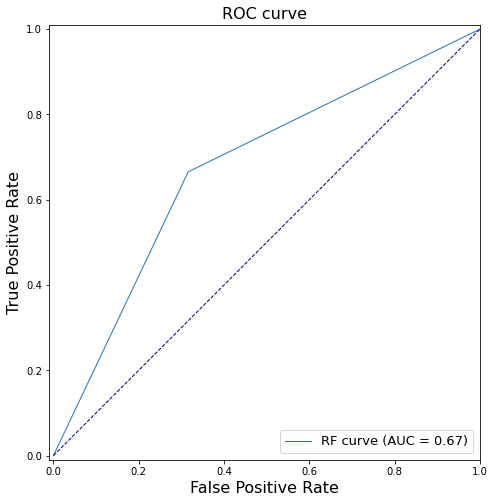

PCA Transformed - 34 dimensions is :-
[8.76934418e+00 6.53212844e+00 3.31259326e+00 1.96931118e+00
 1.78042776e+00 1.29881047e+00 1.05931957e+00 6.37876656e-01
 5.64828238e-01 4.20376915e-01 3.93918894e-01 3.57745542e-01
 3.17313916e-01 2.82338507e-01 2.33905346e-01 2.17620206e-01
 1.78544006e-01 1.67643180e-01 1.55472165e-01 1.33762192e-01
 1.15994465e-01 1.08073130e-01 9.38207612e-02 8.07127169e-02
 7.55615060e-02 5.96366221e-02 4.73409177e-02 4.14235029e-02
 2.14962320e-02 1.64283375e-02 1.07035387e-02 8.58970261e-03
 6.62304927e-03 5.99459573e-03]
[[394 185]
 [180 355]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


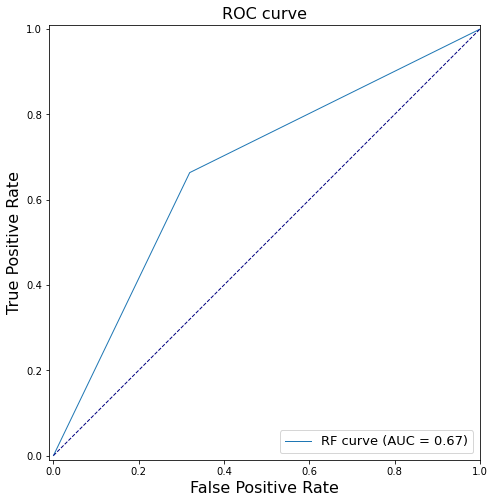

In [6]:
#Checking for best PCA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (2,35):
    pca = PCA(n_components=i,svd_solver='full')
    X_pca = pca.fit_transform(X)
    print("PCA Transformed - "+str(i)+ " dimensions is :-" )
    print(pca.explained_variance_)
    forest_test(X_pca, Y)

In [ ]:
#Plotting Best PCA
pca = PCA(n_components=10,svd_solver='full')
X_pca = pca.fit_transform(X)
print("PCA Transformed Best is in 10 dimensions Resulting in :-" )
print(pca.explained_variance_)
forest_test(X_pca, Y)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3713 samples in 0.118s...
[t-SNE] Computed neighbors for 3713 samples in 0.748s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3713
[t-SNE] Computed conditional probabilities for sample 2000 / 3713
[t-SNE] Computed conditional probabilities for sample 3000 / 3713
[t-SNE] Computed conditional probabilities for sample 3713 / 3713
[t-SNE] Mean sigma: 0.894876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.860580
[t-SNE] KL divergence after 600 iterations: 1.252723
[[373 206]
 [222 313]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       579
           1       0.60      0.59      0.59       535

    accuracy                           0.62      1114
   macro avg       0.61      0.61      0.61      1114
weighted avg       0.62      0.62      0.62      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


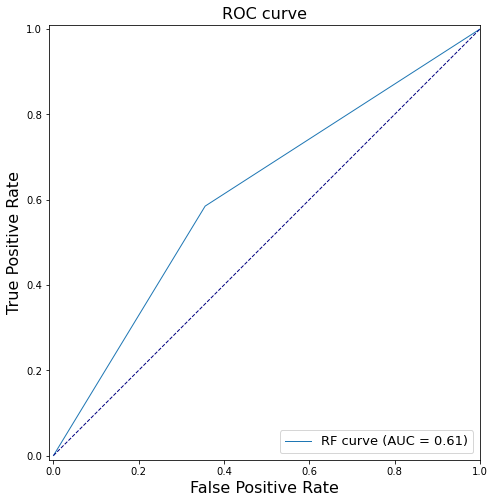

In [7]:
#tSNE dimension reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
X_tsne = tsne.fit_transform(X)
forest_test(X_tsne, Y)

Base Non-Tranformed data
[[394 185]
 [182 353]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


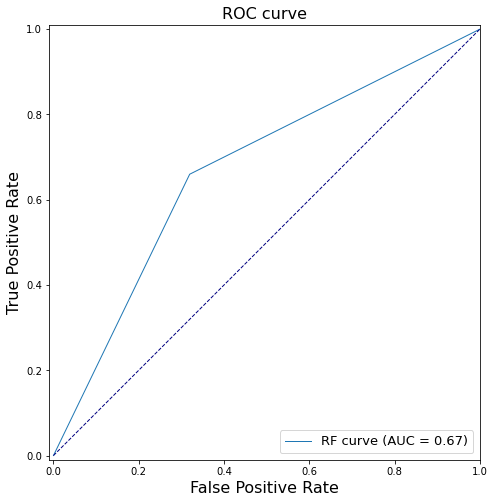

LLE Transformed - 1 dimensions is :-
[[346 233]
 [251 284]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       579
           1       0.55      0.53      0.54       535

    accuracy                           0.57      1114
   macro avg       0.56      0.56      0.56      1114
weighted avg       0.57      0.57      0.57      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


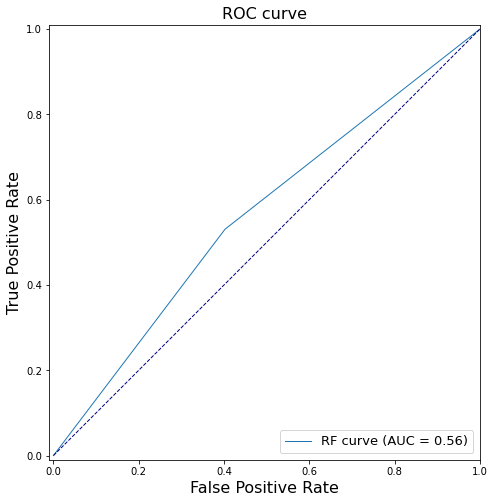

LLE Transformed - 2 dimensions is :-
[[360 219]
 [228 307]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       579
           1       0.58      0.57      0.58       535

    accuracy                           0.60      1114
   macro avg       0.60      0.60      0.60      1114
weighted avg       0.60      0.60      0.60      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


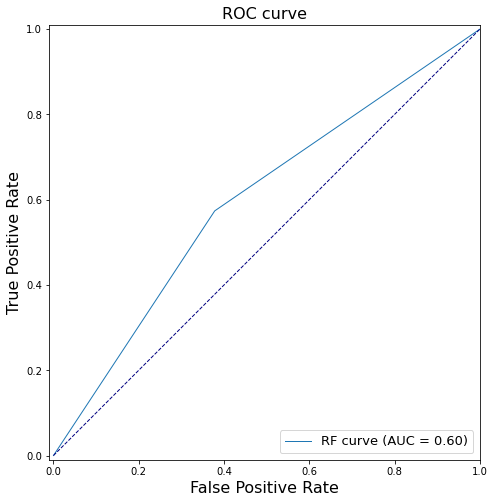

LLE Transformed - 3 dimensions is :-
[[344 235]
 [224 311]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       579
           1       0.57      0.58      0.58       535

    accuracy                           0.59      1114
   macro avg       0.59      0.59      0.59      1114
weighted avg       0.59      0.59      0.59      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


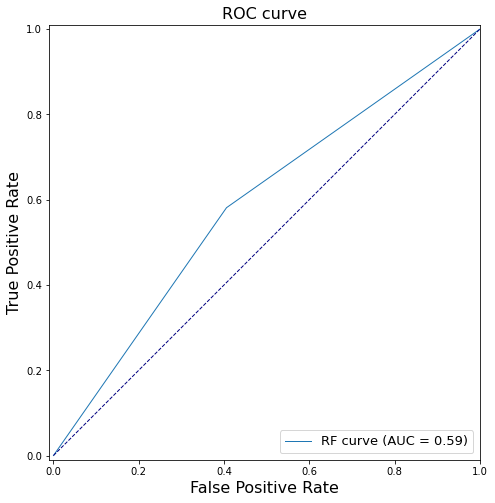

LLE Transformed - 4 dimensions is :-
[[356 223]
 [213 322]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       579
           1       0.59      0.60      0.60       535

    accuracy                           0.61      1114
   macro avg       0.61      0.61      0.61      1114
weighted avg       0.61      0.61      0.61      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


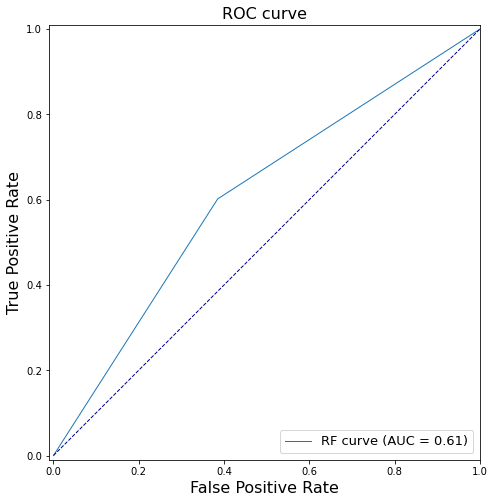

LLE Transformed - 5 dimensions is :-
[[347 232]
 [229 306]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       579
           1       0.57      0.57      0.57       535

    accuracy                           0.59      1114
   macro avg       0.59      0.59      0.59      1114
weighted avg       0.59      0.59      0.59      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


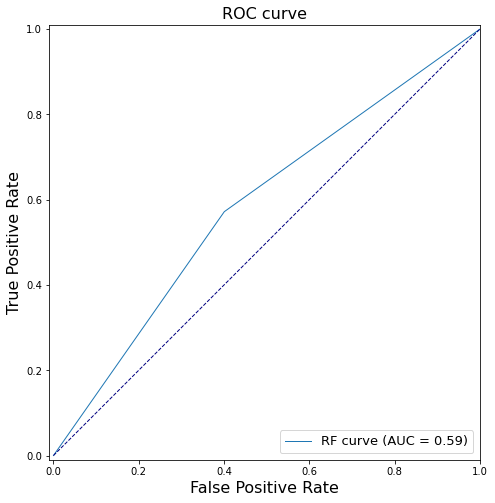

LLE Transformed - 6 dimensions is :-
[[346 233]
 [237 298]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       579
           1       0.56      0.56      0.56       535

    accuracy                           0.58      1114
   macro avg       0.58      0.58      0.58      1114
weighted avg       0.58      0.58      0.58      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


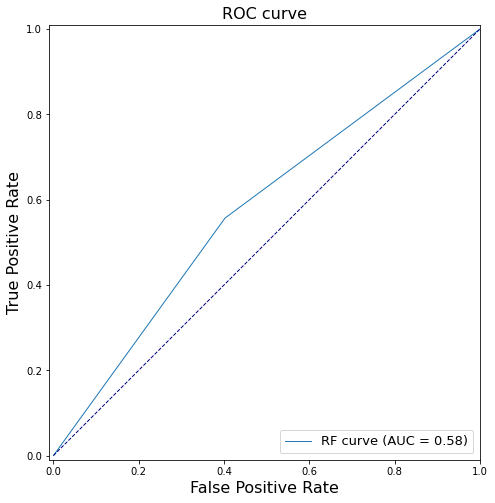

LLE Transformed - 7 dimensions is :-
[[363 216]
 [246 289]]
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       579
           1       0.57      0.54      0.56       535

    accuracy                           0.59      1114
   macro avg       0.58      0.58      0.58      1114
weighted avg       0.58      0.59      0.58      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


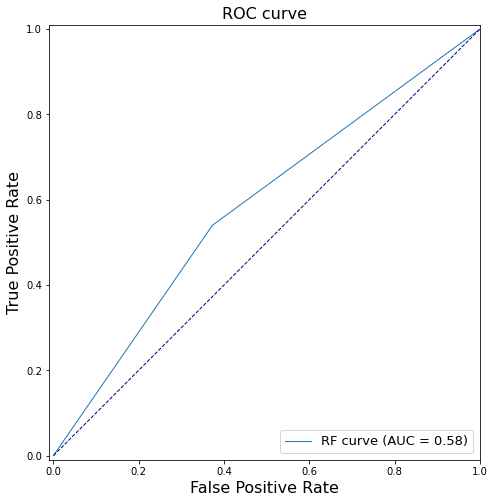

LLE Transformed - 8 dimensions is :-
[[362 217]
 [258 277]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       579
           1       0.56      0.52      0.54       535

    accuracy                           0.57      1114
   macro avg       0.57      0.57      0.57      1114
weighted avg       0.57      0.57      0.57      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


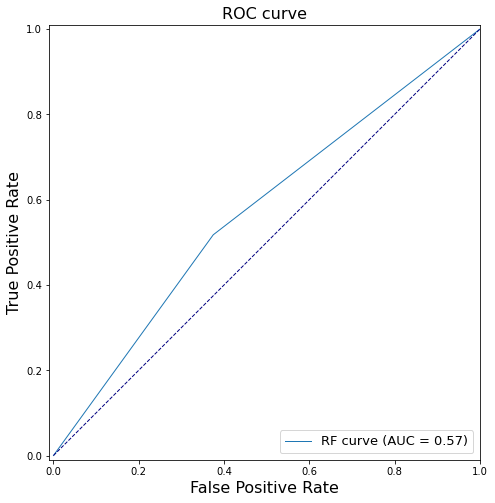

LLE Transformed - 9 dimensions is :-
[[360 219]
 [181 354]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       579
           1       0.62      0.66      0.64       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


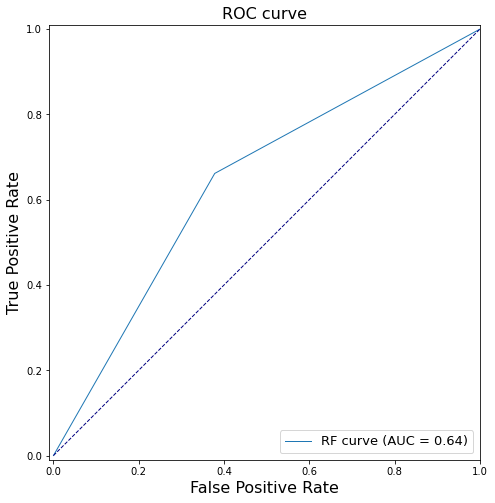

LLE Transformed - 10 dimensions is :-
[[377 202]
 [215 320]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       579
           1       0.61      0.60      0.61       535

    accuracy                           0.63      1114
   macro avg       0.62      0.62      0.62      1114
weighted avg       0.63      0.63      0.63      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


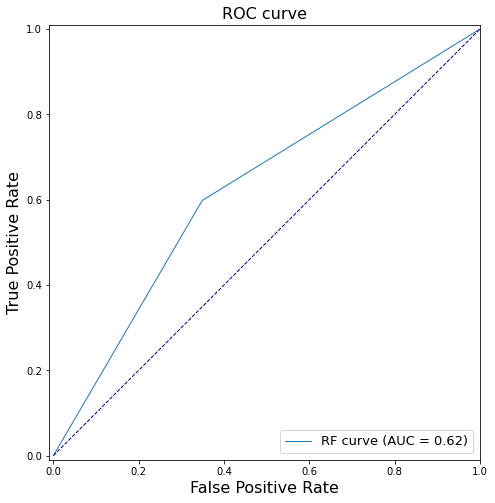

LLE Transformed - 11 dimensions is :-
[[378 201]
 [214 321]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       579
           1       0.61      0.60      0.61       535

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.63      1114
weighted avg       0.63      0.63      0.63      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


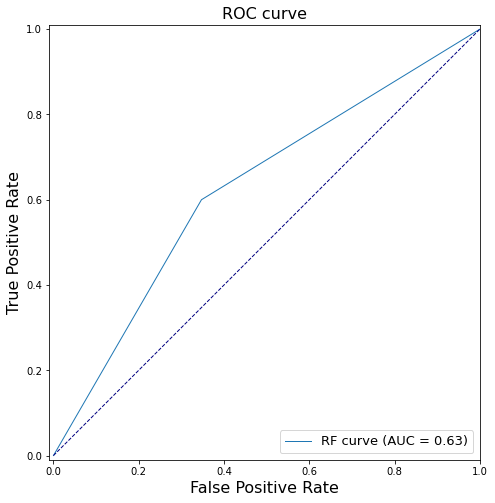

LLE Transformed - 12 dimensions is :-
[[384 195]
 [212 323]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       579
           1       0.62      0.60      0.61       535

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.63      1114
weighted avg       0.63      0.63      0.63      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


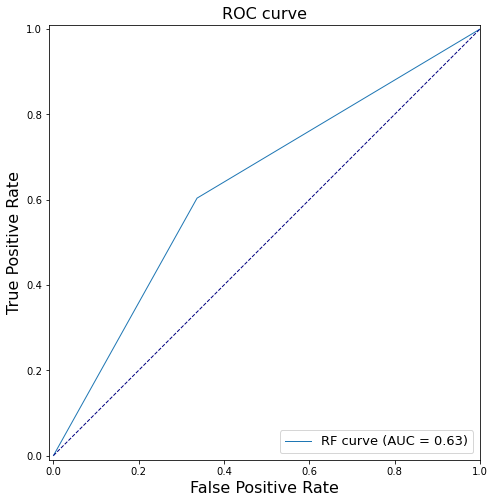

LLE Transformed - 13 dimensions is :-
[[383 196]
 [209 326]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       579
           1       0.62      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


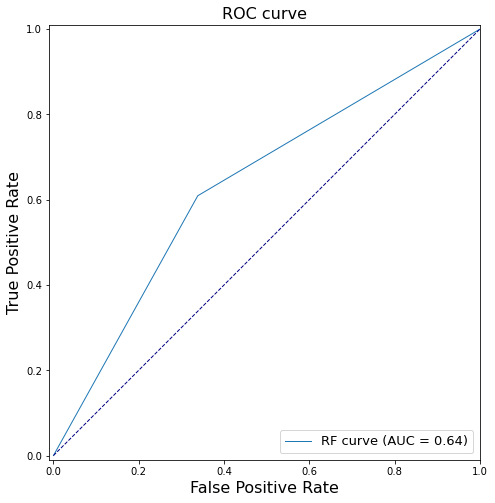

LLE Transformed - 14 dimensions is :-
[[374 205]
 [204 331]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       579
           1       0.62      0.62      0.62       535

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.63      1114
weighted avg       0.63      0.63      0.63      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


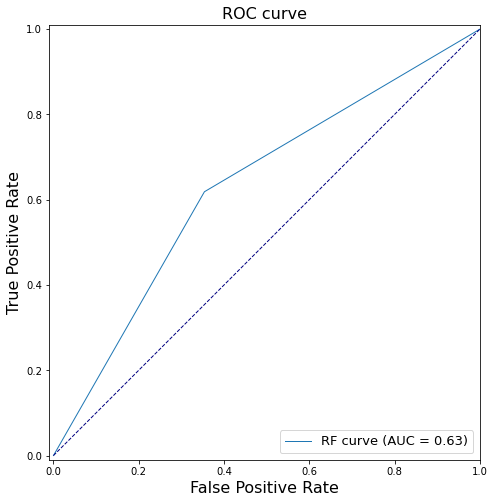

LLE Transformed - 15 dimensions is :-
[[374 205]
 [202 333]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       579
           1       0.62      0.62      0.62       535

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.63      1114
weighted avg       0.63      0.63      0.63      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


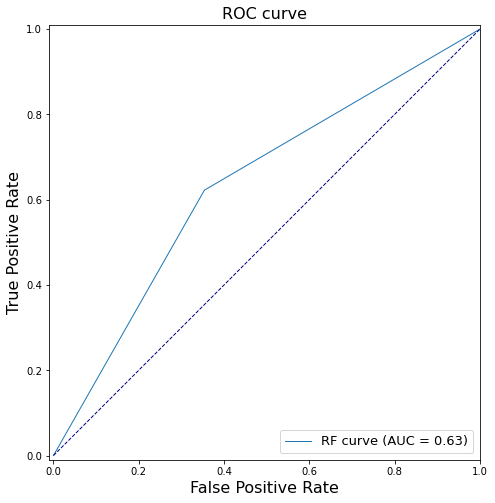

LLE Transformed - 16 dimensions is :-
[[381 198]
 [201 334]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       579
           1       0.63      0.62      0.63       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


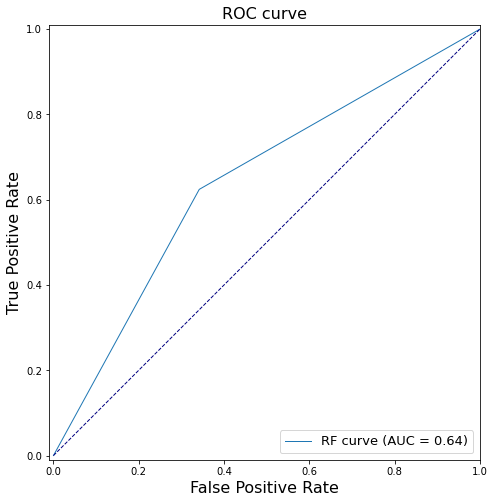

LLE Transformed - 17 dimensions is :-
[[391 188]
 [208 327]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       579
           1       0.63      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


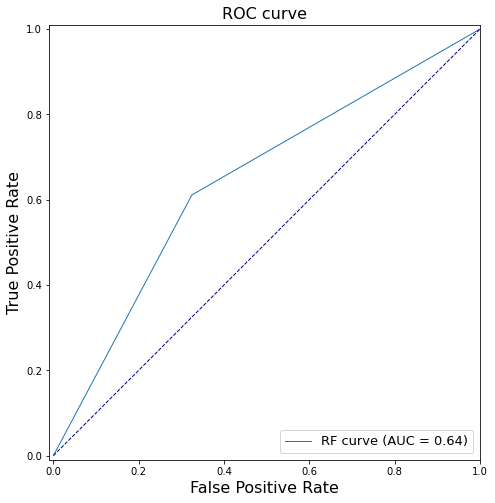

LLE Transformed - 18 dimensions is :-
[[390 189]
 [211 324]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       579
           1       0.63      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


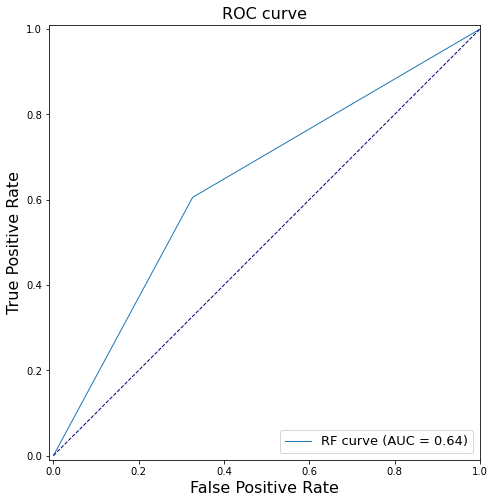

LLE Transformed - 19 dimensions is :-
[[389 190]
 [209 326]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       579
           1       0.63      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


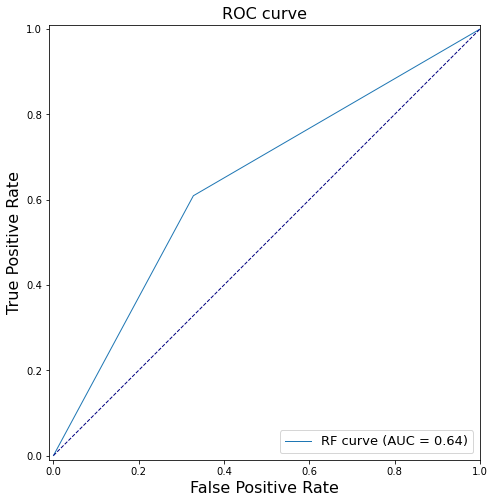

LLE Transformed - 20 dimensions is :-
[[392 187]
 [211 324]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       579
           1       0.63      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


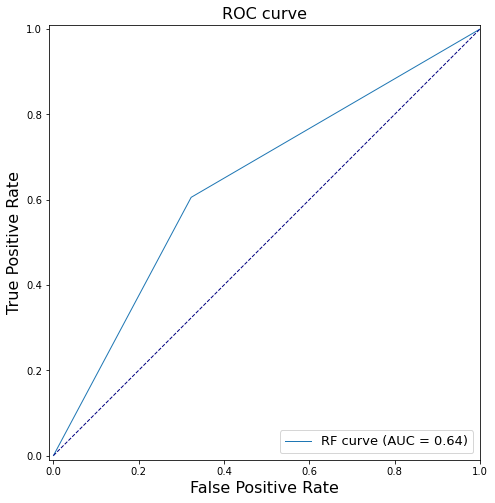

LLE Transformed - 21 dimensions is :-
[[388 191]
 [214 321]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       579
           1       0.63      0.60      0.61       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


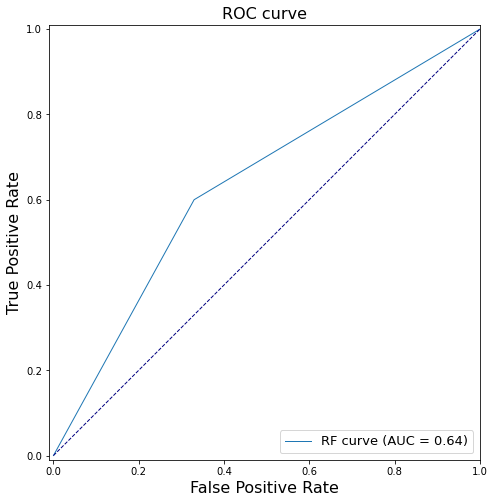

LLE Transformed - 22 dimensions is :-
[[394 185]
 [209 326]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       579
           1       0.64      0.61      0.62       535

    accuracy                           0.65      1114
   macro avg       0.65      0.64      0.64      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


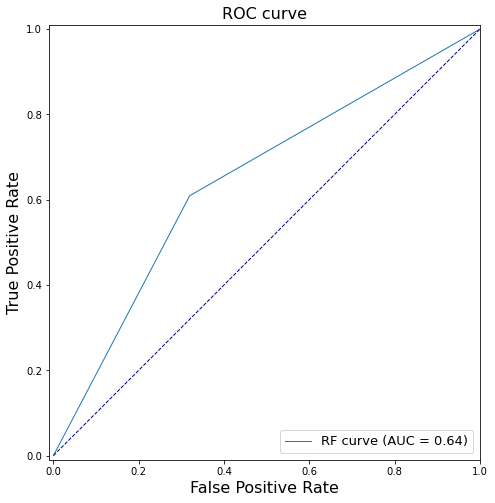

LLE Transformed - 23 dimensions is :-
[[396 183]
 [209 326]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       579
           1       0.64      0.61      0.62       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


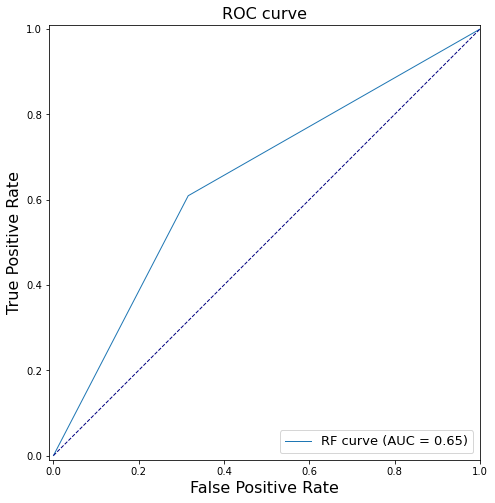

LLE Transformed - 24 dimensions is :-
[[388 191]
 [208 327]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       579
           1       0.63      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


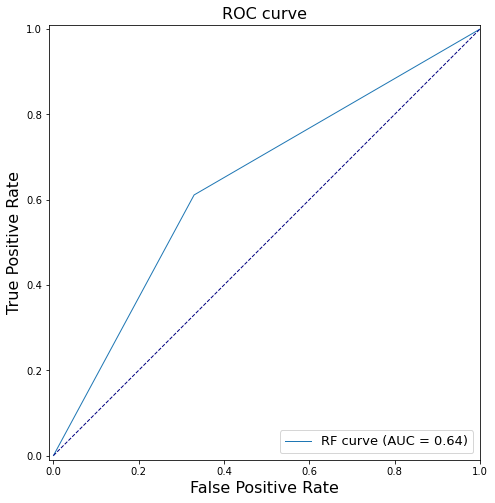

LLE Transformed - 25 dimensions is :-
[[388 191]
 [207 328]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       579
           1       0.63      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


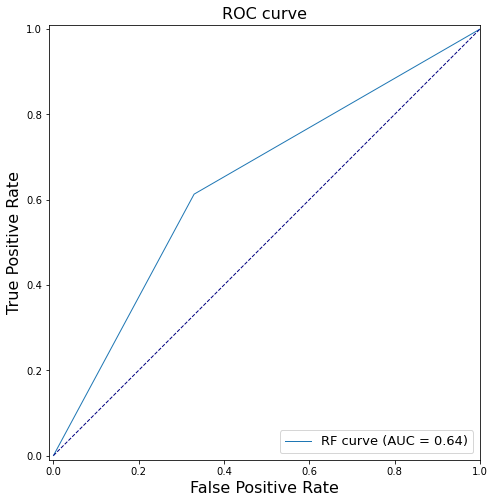

LLE Transformed - 26 dimensions is :-
[[394 185]
 [201 334]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       579
           1       0.64      0.62      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


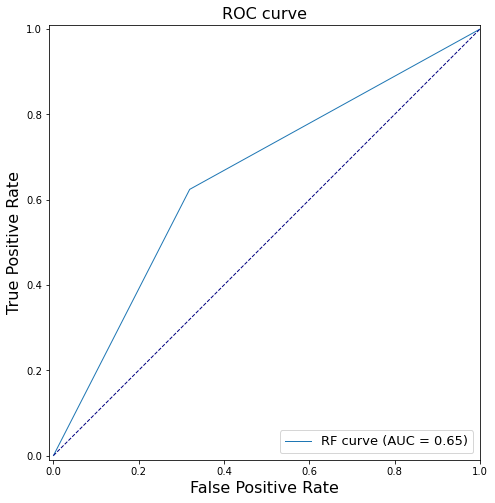

LLE Transformed - 27 dimensions is :-
[[399 180]
 [199 336]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       579
           1       0.65      0.63      0.64       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


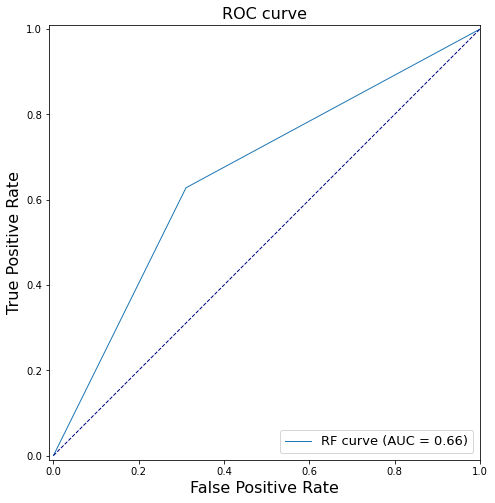

LLE Transformed - 28 dimensions is :-
[[396 183]
 [203 332]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       579
           1       0.64      0.62      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


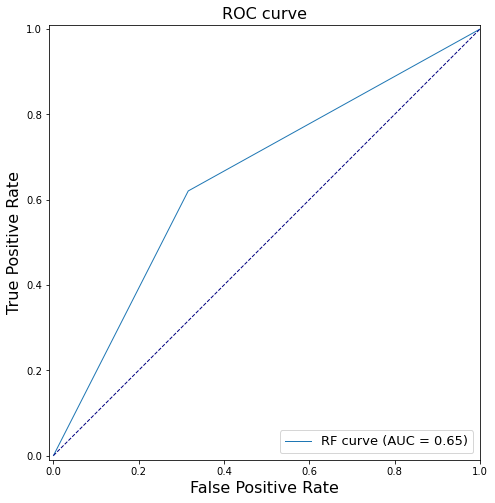

LLE Transformed - 29 dimensions is :-
[[398 181]
 [207 328]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       579
           1       0.64      0.61      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


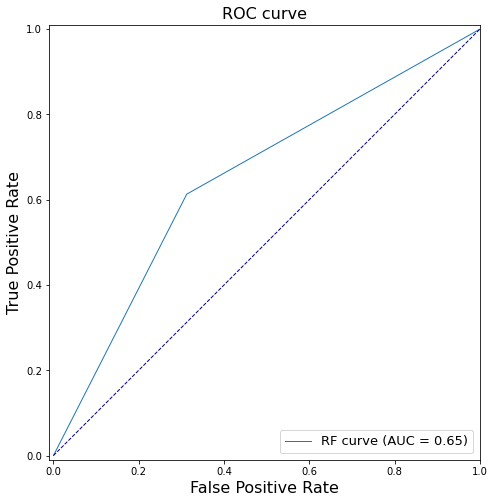

In [8]:
#Checking for best LLE dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (1,30):
    embedding = LocallyLinearEmbedding(n_components=i)

# run an LLE and use it to transform the features
    X_lle = embedding.fit_transform(X)
    print("LLE Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_lle, Y)

LDA Transformed Best is in 1 dimensions is :-
[[367 212]
 [212 323]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       579
           1       0.60      0.60      0.60       535

    accuracy                           0.62      1114
   macro avg       0.62      0.62      0.62      1114
weighted avg       0.62      0.62      0.62      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


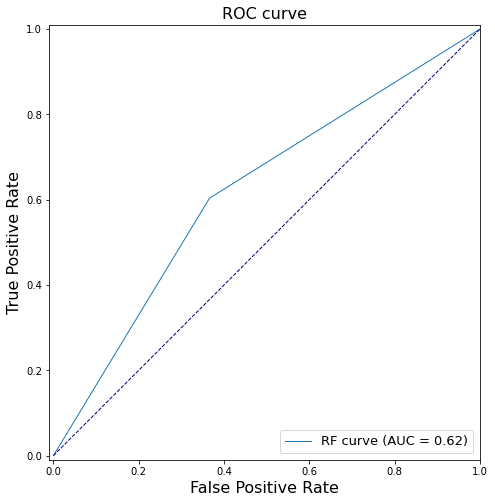

In [9]:
#Plotting Best LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, Y).transform(X)
print("LDA Transformed Best is in 1 dimensions is :-" )
forest_test(X_lda, Y)

Base Non-Tranformed data
[[390 189]
 [188 347]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       579
           1       0.65      0.65      0.65       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


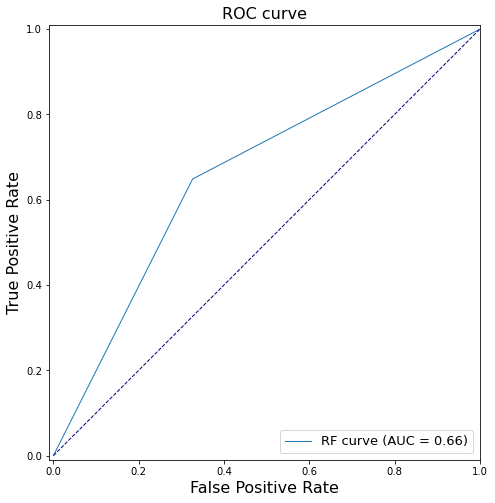

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 3 dimensions is :-
[[383 196]
 [198 337]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       579
           1       0.63      0.63      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


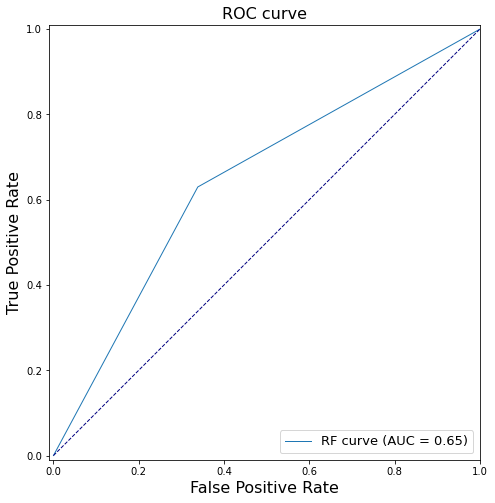

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 4 dimensions is :-
[[369 210]
 [201 334]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       579
           1       0.61      0.62      0.62       535

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.63      1114
weighted avg       0.63      0.63      0.63      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


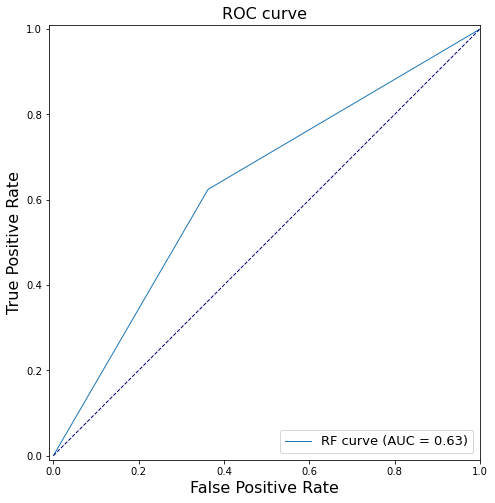

ICA Transformed - 5 dimensions is :-
[[383 196]
 [207 328]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       579
           1       0.63      0.61      0.62       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


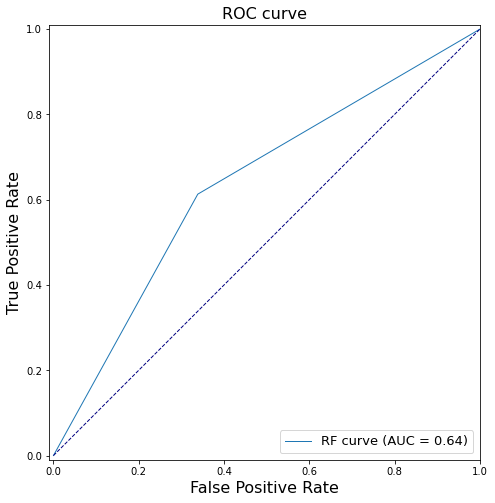

ICA Transformed - 6 dimensions is :-
[[372 207]
 [204 331]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       579
           1       0.62      0.62      0.62       535

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.63      1114
weighted avg       0.63      0.63      0.63      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


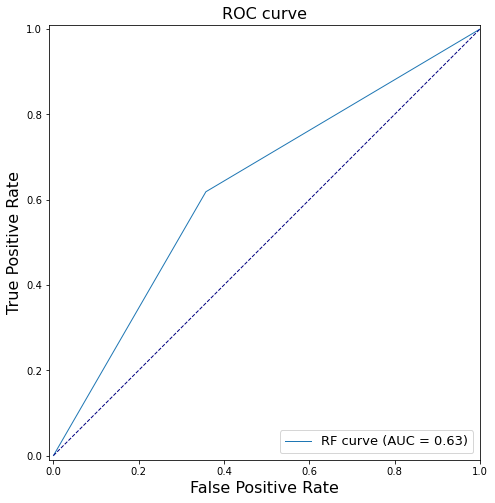

ICA Transformed - 7 dimensions is :-
[[382 197]
 [193 342]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       579
           1       0.63      0.64      0.64       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


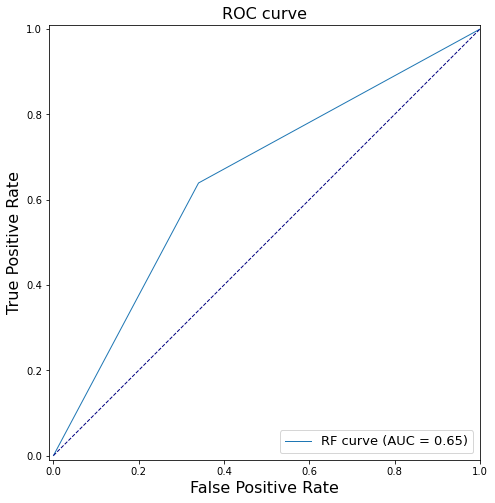

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 8 dimensions is :-
[[386 193]
 [197 338]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       579
           1       0.64      0.63      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


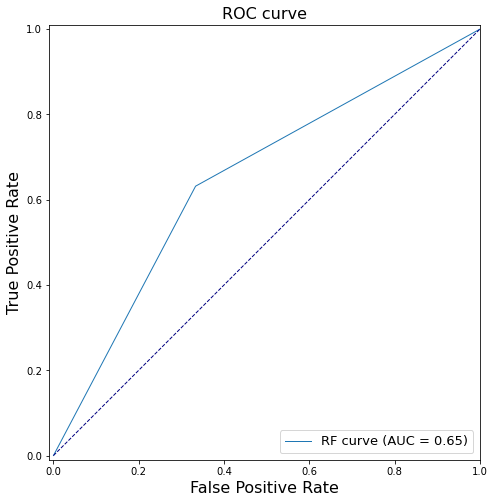

ICA Transformed - 9 dimensions is :-
[[381 198]
 [201 334]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       579
           1       0.63      0.62      0.63       535

    accuracy                           0.64      1114
   macro avg       0.64      0.64      0.64      1114
weighted avg       0.64      0.64      0.64      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


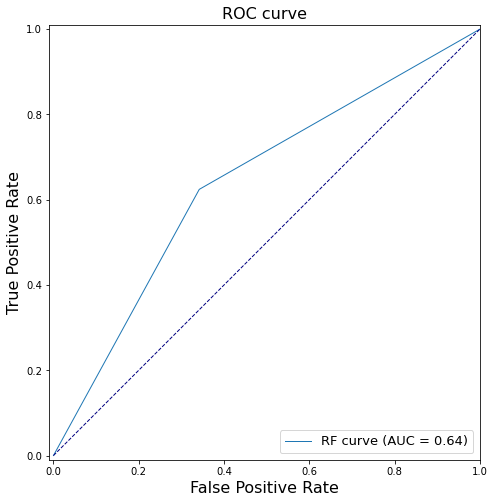

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 10 dimensions is :-
[[385 194]
 [191 344]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       579
           1       0.64      0.64      0.64       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


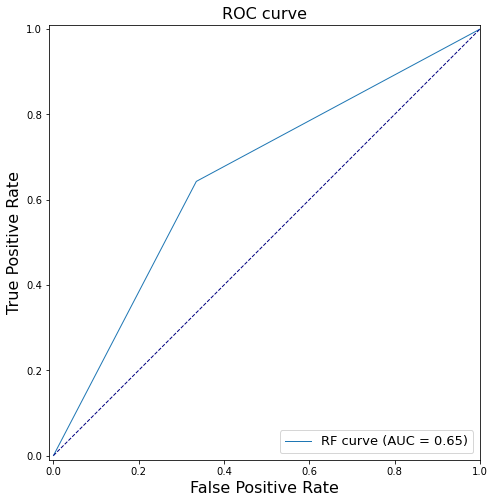

ICA Transformed - 11 dimensions is :-
[[390 189]
 [201 334]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       579
           1       0.64      0.62      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


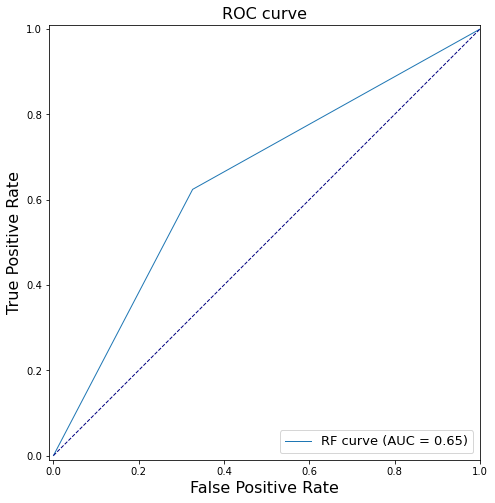

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 12 dimensions is :-
[[391 188]
 [202 333]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       579
           1       0.64      0.62      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


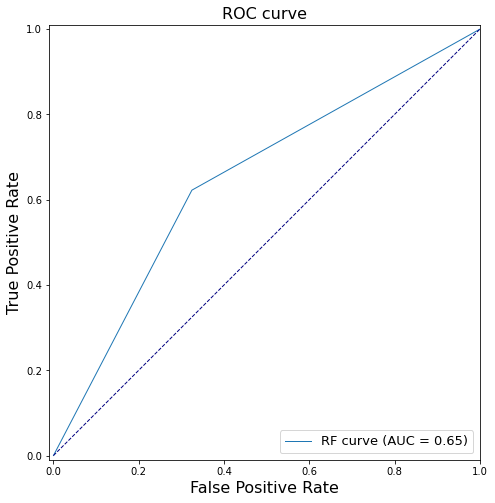

ICA Transformed - 13 dimensions is :-
[[396 183]
 [193 342]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       579
           1       0.65      0.64      0.65       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


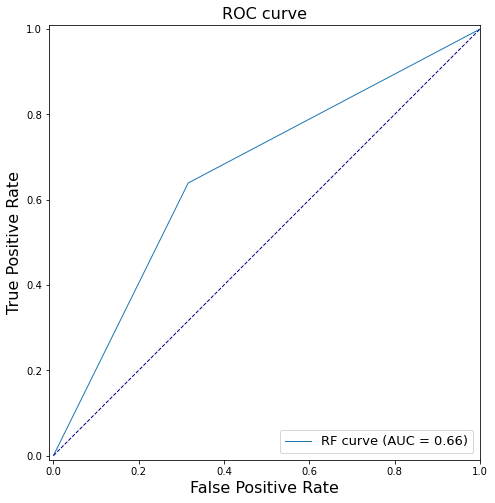

ICA Transformed - 14 dimensions is :-
[[384 195]
 [196 339]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       579
           1       0.63      0.63      0.63       535

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


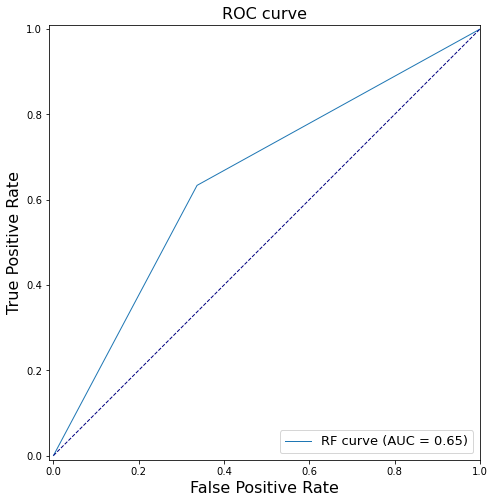

ICA Transformed - 15 dimensions is :-
[[395 184]
 [191 344]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       579
           1       0.65      0.64      0.65       535

    accuracy                           0.66      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.66      0.66      0.66      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


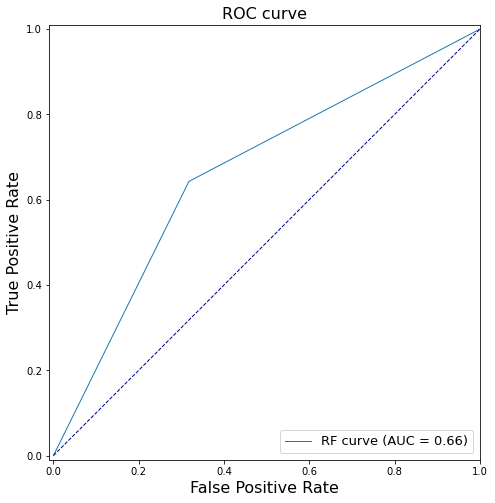

ICA Transformed - 16 dimensions is :-
[[394 185]
 [184 351]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.65      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


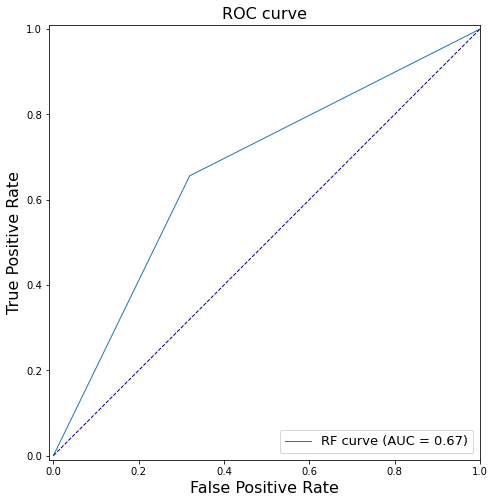

ICA Transformed - 17 dimensions is :-
[[396 183]
 [190 345]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.65      0.64      0.65       535

    accuracy                           0.67      1114
   macro avg       0.66      0.66      0.66      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


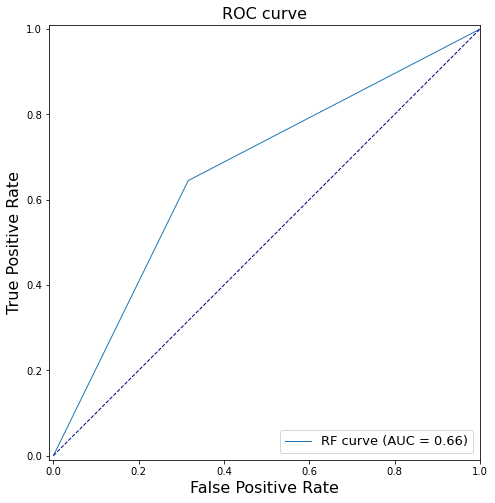

ICA Transformed - 18 dimensions is :-
[[397 182]
 [182 353]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


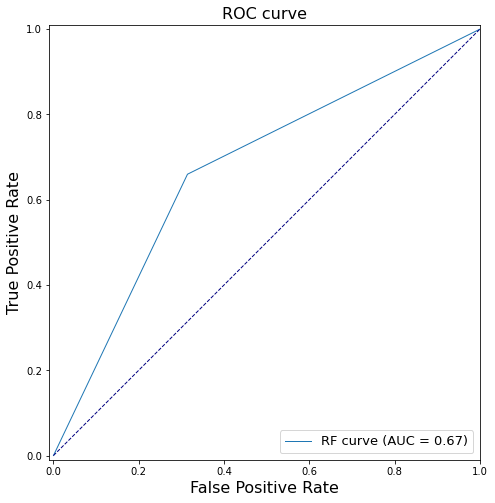

ICA Transformed - 19 dimensions is :-
[[414 165]
 [193 342]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       579
           1       0.67      0.64      0.66       535

    accuracy                           0.68      1114
   macro avg       0.68      0.68      0.68      1114
weighted avg       0.68      0.68      0.68      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


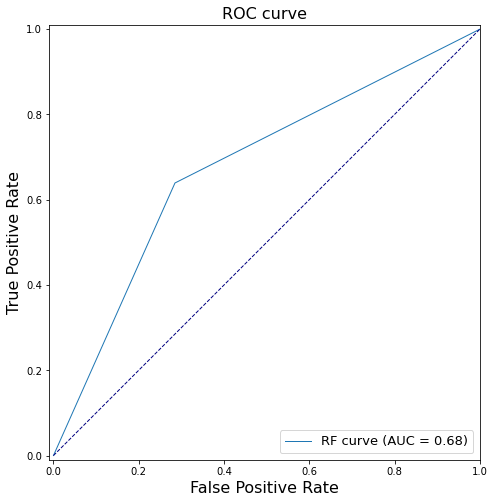

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 20 dimensions is :-
[[394 185]
 [183 352]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


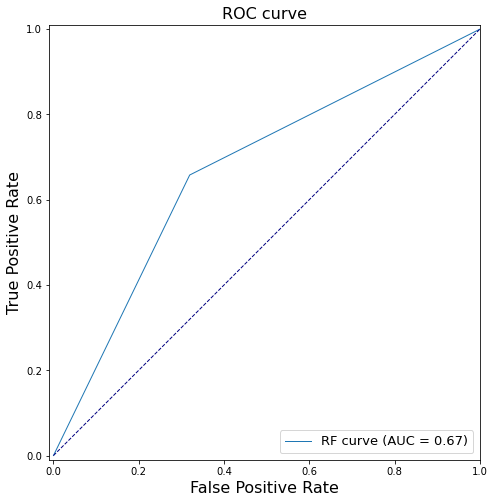

ICA Transformed - 21 dimensions is :-
[[398 181]
 [183 352]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


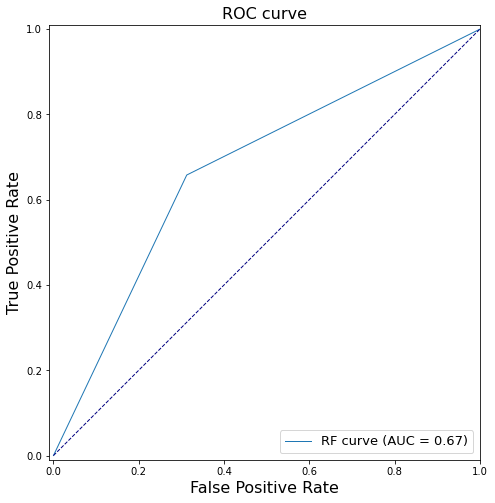

ICA Transformed - 22 dimensions is :-
[[400 179]
 [173 362]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       579
           1       0.67      0.68      0.67       535

    accuracy                           0.68      1114
   macro avg       0.68      0.68      0.68      1114
weighted avg       0.68      0.68      0.68      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


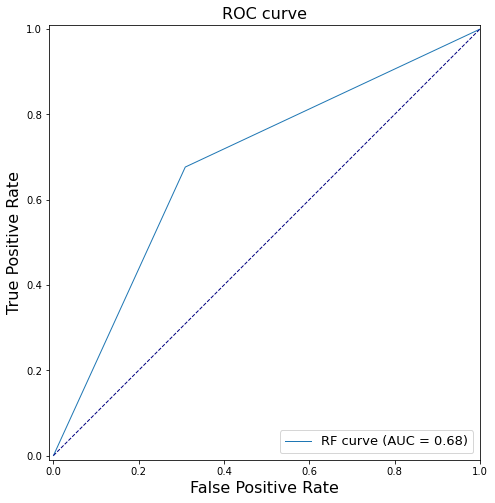

ICA Transformed - 23 dimensions is :-
[[393 186]
 [185 350]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.65      0.65      0.65       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


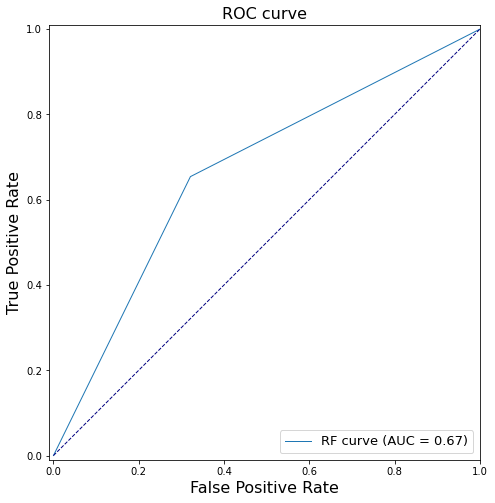

ICA Transformed - 24 dimensions is :-
[[391 188]
 [177 358]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       579
           1       0.66      0.67      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


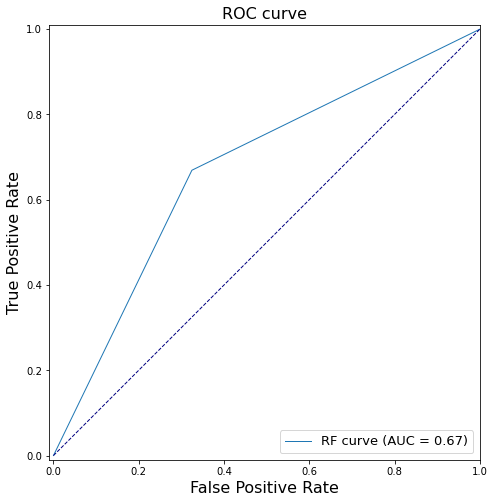

ICA Transformed - 25 dimensions is :-
[[403 176]
 [190 345]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       579
           1       0.66      0.64      0.65       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


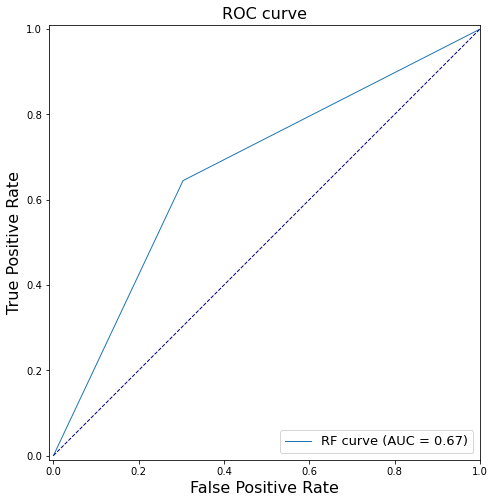

ICA Transformed - 26 dimensions is :-
[[396 183]
 [184 351]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


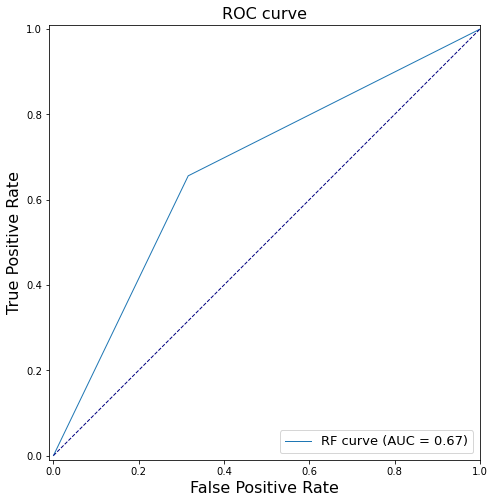

ICA Transformed - 27 dimensions is :-
[[404 175]
 [188 347]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       579
           1       0.66      0.65      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


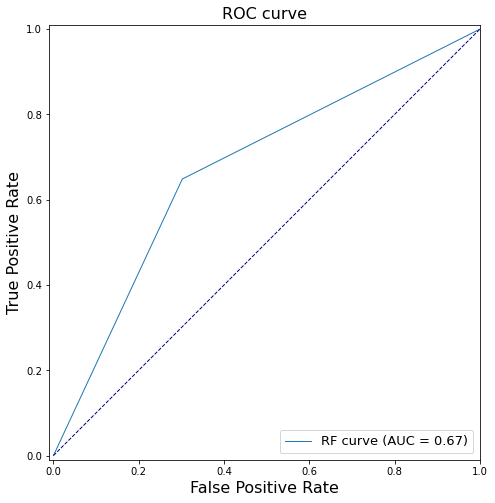

ICA Transformed - 28 dimensions is :-
[[400 179]
 [184 351]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


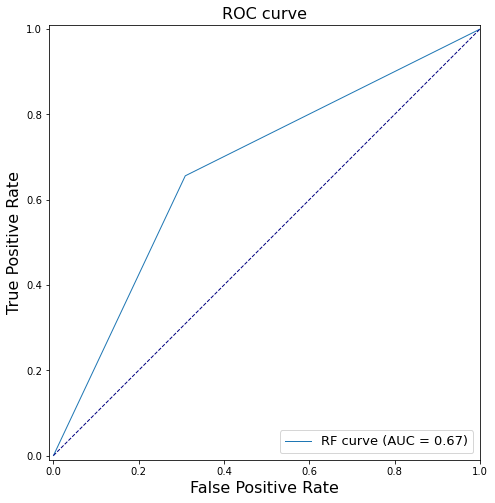

ICA Transformed - 29 dimensions is :-
[[396 183]
 [181 354]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       579
           1       0.66      0.66      0.66       535

    accuracy                           0.67      1114
   macro avg       0.67      0.67      0.67      1114
weighted avg       0.67      0.67      0.67      1114



<ipython-input-2-cbd013243ef7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


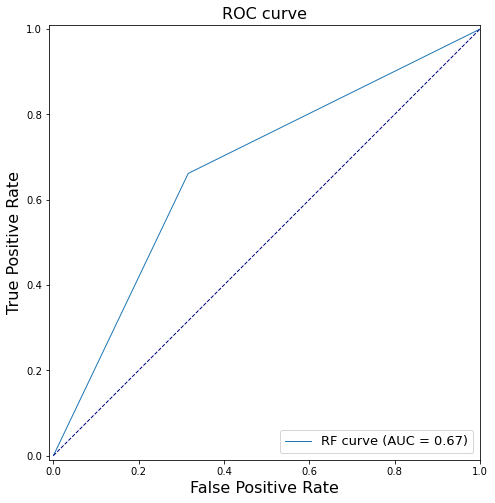

In [10]:
#Checking for best ICA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (3,30):
    ica = FastICA(n_components=i)
    X_ica = ica.fit_transform(X)
    print("ICA Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_ica, Y)

Best ICA Transformed in 8 dimensions is :-
[[7432  480]
 [ 481 1855]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.79      0.79      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


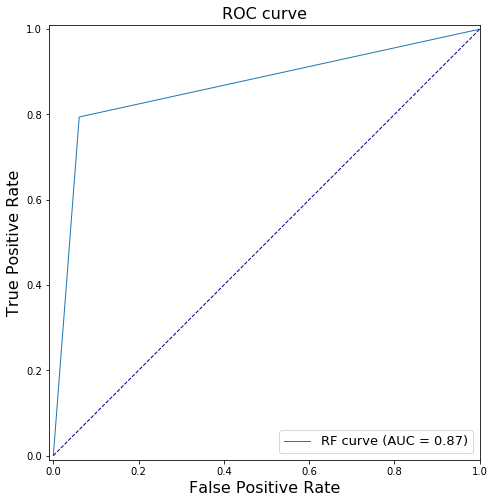

In [6]:
#Plotting Best ICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
print("Best ICA Transformed in 8 dimensions is :-" )
forest_test(X_ica, Y)